In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [143]:

df = pd.read_csv(os.path.join(os.getcwd(), "customer_segmentation.csv"))


In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isna().sum().sum()

24

In [10]:
df.dropna(inplace = True)

In [11]:
df.isna().sum().sum()

0

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [15]:
df.Education.value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [16]:
df.Marital_Status.value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [20]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [22]:
df['Age'] = 2025 - df['Year_Birth']
df.Age

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [24]:
df['Total_Childer'] = df['Kidhome'] + df['Teenhome']

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Childer'],
      dtype='object')

In [26]:
spending_cols = ['MntWines','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds']

In [27]:
df['Total_spending'] = df[spending_cols].sum(axis = 1)

In [29]:
df[['Total_spending']]

,Total_spending
0,1071
1,21
2,649
3,33
4,304
...,...
2235,1159
2236,414
2237,1024
2238,629


In [31]:
df['Customer_Since']= (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [32]:
df.Customer_Since

0       4808
1       4258
2       4457
3       4284
4       4306
        ... 
2235    4526
2236    4164
2237    4300
2238    4301
2239    4767
Name: Customer_Since, Length: 2216, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

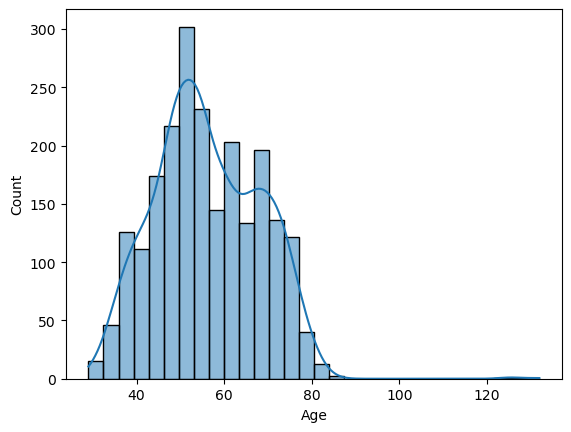

In [33]:
sns.histplot(df['Age'], bins = 30, kde = True)

<Axes: xlabel='Income', ylabel='Count'>

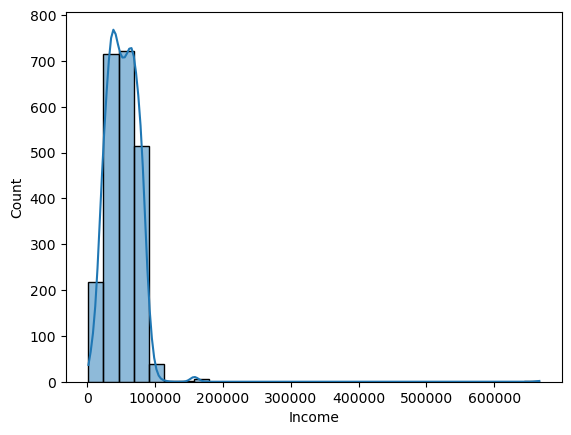

In [34]:
sns.histplot(df['Income'], bins = 30, kde = True)

<Axes: xlabel='Total_spending', ylabel='Count'>

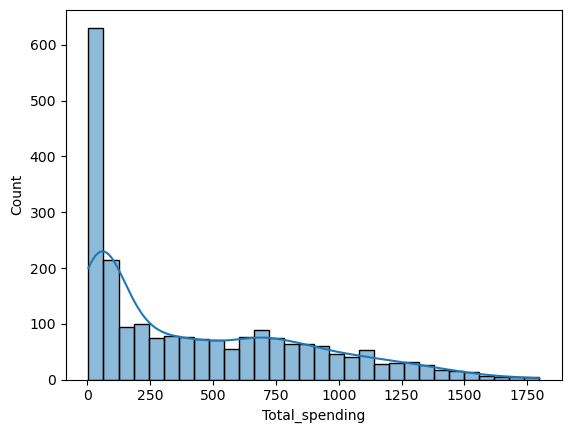

In [35]:
sns.histplot(df['Total_spending'],bins = 30 , kde = True)

Text(0.5, 1.0, 'Income by Education Level')

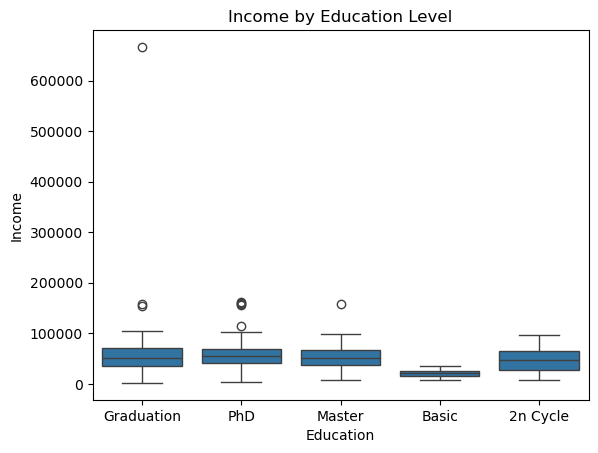

In [38]:
sns.boxplot(x = 'Education',y = 'Income',data = df)
plt.title('Income by Education Level')

Text(0.5, 1.0, 'spending by Marital Status')

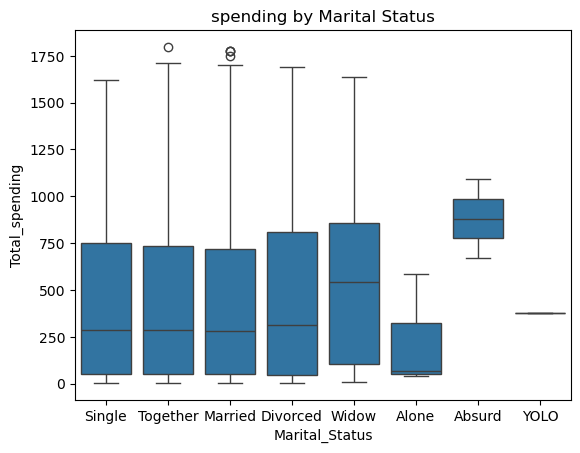

In [40]:
sns.boxplot(x='Marital_Status',y= 'Total_spending',data = df)
plt.title('spending by Marital Status')

In [44]:
corr = df[['Income','Age','Recency','Total_spending','NumWebPurchases','NumStorePurchases']].corr()

In [45]:
corr

,Income,Age,Recency,Total_spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.630844,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.141494,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.016383,-0.005641,-0.000434
Total_spending,0.630844,0.141494,0.016383,1.000000,0.581291,0.692928
NumWebPurchases,0.387878,0.153051,-0.005641,0.581291,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.692928,0.516240,1.000000


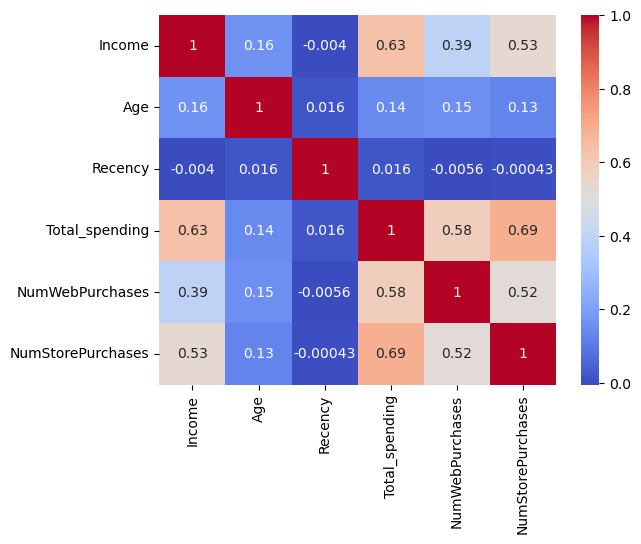

In [47]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [50]:
pivot_income = df.pivot_table(values = 'Income', index = 'Education',columns = "Marital_Status", aggfunc = 'mean')

In [51]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Inome by Education and Marital Status')

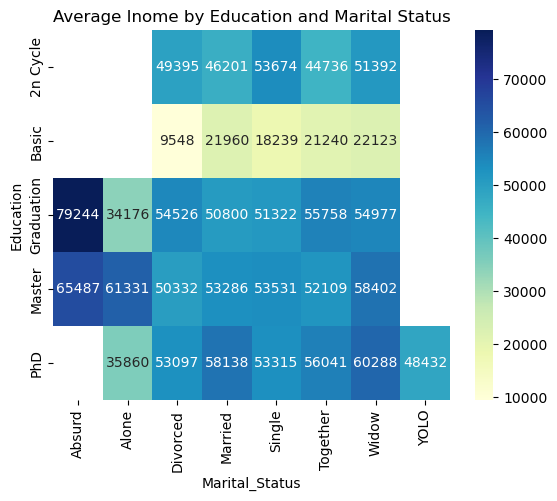

In [56]:
sns.heatmap(pivot_income,annot = True, cmap = 'YlGnBu', fmt = '.0f')
plt.title('Average Inome by Education and Marital Status')

In [58]:
group1 = df.groupby('Education')['Total_spending'].mean().sort_values(ascending = False)
group1

Education
PhD           506.995842
Master        446.846575
Graduation    441.293011
2n Cycle      359.850000
Basic          70.351852
Name: Total_spending, dtype: float64

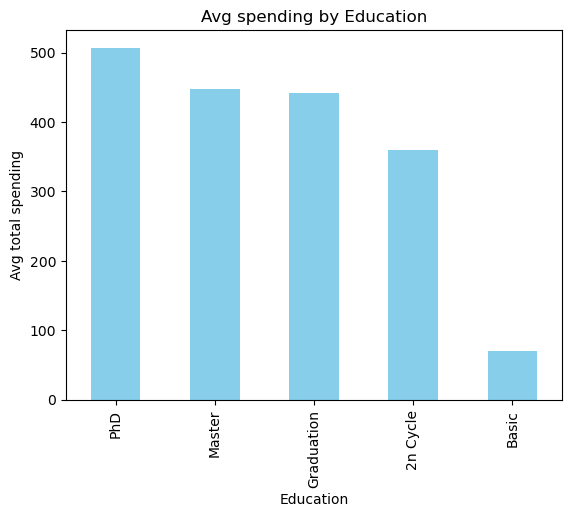

In [59]:
group1.plot(kind='bar',color = 'skyblue')
plt.title('Avg spending by Education')
plt.ylabel('Avg total spending')
plt.show()

In [62]:
df['AcceptedAny'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis = 1)

In [65]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [66]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x: 1 if x>0 else 0)


In [67]:
df['AcceptedAny'].unique()

array([1, 0], dtype=int64)

In [71]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending = False)

In [69]:
group2

Marital_Status
Together    0.251309
Married     0.252042
Divorced    0.297414
Single      0.312102
Alone       0.333333
Widow       0.342105
Absurd      0.500000
YOLO        0.500000
Name: AcceptedAny, dtype: float64

Text(0.5, 1.0, 'Campaign Acceptance Rate by marital status')

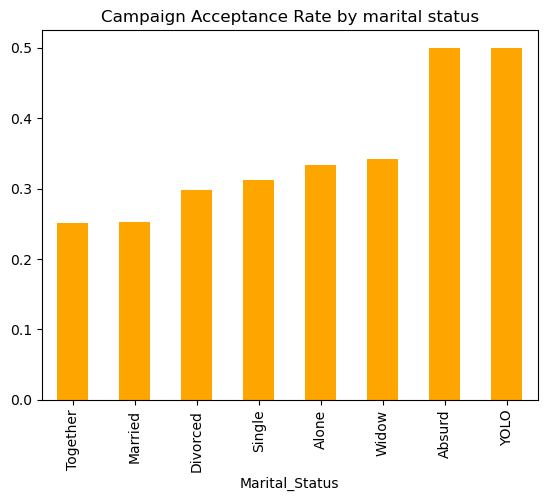

In [70]:
group2.plot(kind = 'bar',color = 'orange')
plt.title('Campaign Acceptance Rate by marital status')

In [72]:
bins = [18,30,40,50,60,70,90]


In [74]:
labels = ['18-29','30-39','40-49','50-59','60-69','70+']

In [76]:
df['AgeGroup'] = pd.cut(df['Age'],bins = bins , labels = labels)

In [77]:
df['AgeGroup']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [78]:
group3 = df.groupby('AgeGroup')['Income'].mean()

C:\Users\shast\AppData\Local\Temp\ipykernel_8024\3061263347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('AgeGroup')['Income'].mean()


<Axes: ylabel='AgeGroup'>

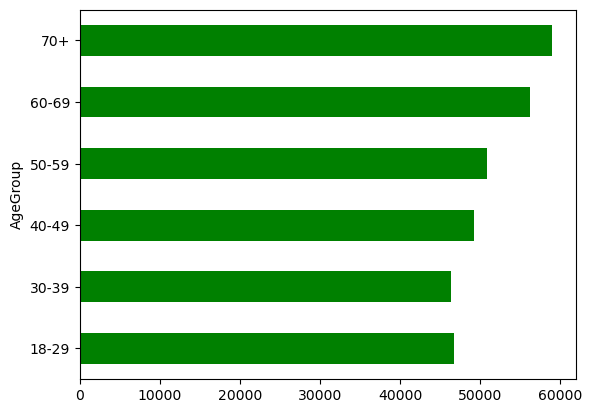

In [79]:
group3.plot(kind = 'barh',color = 'green')

In [80]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Childer,Total_spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1071,4808,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,21,4258,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,649,4457,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,33,4284,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,304,4306,0,40-49


In [81]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Childer', 'Total_spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [ ]:
Age-Income - Total_spending-NumWebPurchases-NumStorePurchase-NumWebVisitsMonth - Recency

NameError: name 'Age' is not defined

In [85]:
features = ['Age','Income','Total_spending','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','Recency']

In [88]:
x = df[features].copy()

In [89]:
x

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1071,8,4,7,58
1,71,46344.0,21,1,2,5,38
2,60,71613.0,649,8,10,4,26
3,41,26646.0,33,2,4,6,26
4,44,58293.0,304,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1159,9,4,5,46
2236,79,64014.0,414,8,5,7,56
2237,44,56981.0,1024,2,13,6,91
2238,69,69245.0,629,6,10,3,8


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
x_scaled = scaler.fit_transform(x)

In [93]:
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.46707183, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.97448021, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.48580044, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.35778331, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.43929469, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.76520432, ..., -0.55414289,
         0.69323197, -0.31140528]])

In [94]:
from sklearn.cluster import KMeans

In [99]:
wcss= []

In [100]:
for i in range(2,10):
    kmeans = KMeans(n_clusters =i )
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\shast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\shast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\shast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\shast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [101]:
wcss

[10220.328907014185,
 9069.051459510003,
 8454.144821451238,
 7845.36380199476,
 7148.454565458159,
 6810.827355374286,
 6454.177082105763,
 6250.069669752699]

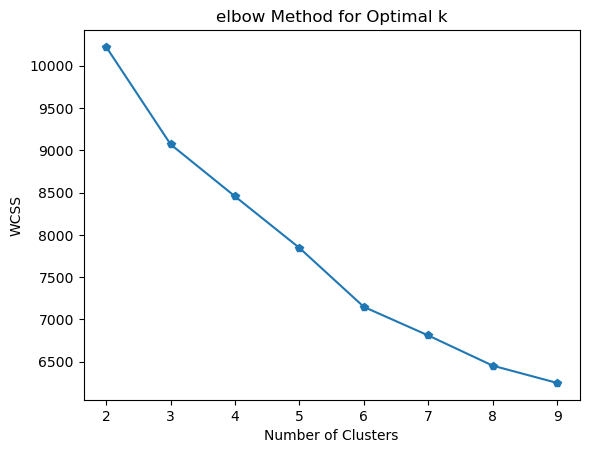

In [103]:
plt.plot(range(2,10),wcss,marker = 'p')
plt.title('elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
import warnings 
warnings.filterwarnings('ignore')

In [107]:
kmeans = KMeans(n_clusters = 6)
df['Cluster'] = kmeans.fit_predict(x_scaled)

In [108]:
df['Cluster']

0       4
1       0
2       3
3       0
4       5
       ..
2235    4
2236    4
2237    1
2238    3
2239    5
Name: Cluster, Length: 2216, dtype: int32

In [109]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Childer,Total_spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1071,4808,1,60-69,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,21,4258,0,70+,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,649,4457,0,50-59,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,33,4284,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,304,4306,0,40-49,5


In [111]:
cluster_summary = df.groupby('Cluster')[features].mean()

In [112]:
cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,50.730620,31682.217054,60.620155,1.887597,2.984496,6.655039,26.918605
1,46.157895,78557.578947,873.913313,4.541796,8.715170,2.631579,50.684211
2,70.362989,73754.042705,801.366548,4.330961,8.377224,2.448399,55.939502
3,61.060284,56533.719858,502.333333,5.819149,6.716312,5.812057,19.503546
4,59.241497,61855.006803,820.931973,8.435374,8.285714,6.309524,60.795918
5,55.769231,36932.730769,102.819231,2.450000,3.492308,6.386538,75.496154


In [113]:
df['Cluster'].value_counts()

Cluster
5    520
0    516
1    323
4    294
3    282
2    281
Name: count, dtype: int64

In [114]:
from sklearn.decomposition import PCA
pca = PCA()

In [118]:
pca_data = pca.fit_transform(x_scaled)
df['PCA1'],df['PCA2'] = pca_data[:,0], pca_data[:,1]

In [119]:
pca_data

array([[ 1.03580047e+00, -6.53640984e-01,  1.58153138e+00, ...,
         8.25858399e-01,  2.29304666e-02,  1.10234148e+00],
       [-1.35682789e+00,  5.57650816e-01, -4.69865554e-01, ...,
         3.27309919e-01,  3.66561125e-04,  3.84843702e-02],
       [ 2.00624296e+00, -9.68060756e-01, -7.34140648e-02, ...,
        -1.78315824e-01,  4.56576675e-01, -5.72618708e-01],
       ...,
       [ 1.30249210e+00,  8.83265696e-01,  4.37598034e-01, ...,
        -1.42165051e+00, -1.65321076e+00, -7.44795617e-02],
       [ 1.92004961e+00, -8.48057420e-01, -7.39621407e-01, ...,
        -5.02952399e-01,  2.49897694e-01, -4.24856607e-01],
       [-8.49851096e-01, -1.22396379e-01,  3.21562711e-01, ...,
         3.56935479e-01, -3.36511433e-01, -3.62612468e-01]])

In [120]:
df['PCA2']

0      -0.653641
1       0.557651
2      -0.968061
3      -0.540356
4       1.014348
          ...   
2235   -0.834840
2236   -0.455087
2237    0.883266
2238   -0.848057
2239   -0.122396
Name: PCA2, Length: 2216, dtype: float64

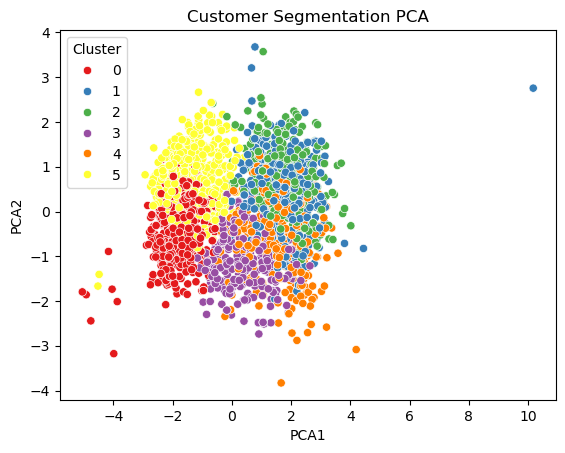

In [122]:
sns.scatterplot(x='PCA1',y='PCA2',hue = 'Cluster',data= df , palette = 'Set1')
plt.title('Customer Segmentation PCA')
plt.show()

In [125]:
cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,50.730620,31682.217054,60.620155,1.887597,2.984496,6.655039,26.918605
1,46.157895,78557.578947,873.913313,4.541796,8.715170,2.631579,50.684211
2,70.362989,73754.042705,801.366548,4.330961,8.377224,2.448399,55.939502
3,61.060284,56533.719858,502.333333,5.819149,6.716312,5.812057,19.503546
4,59.241497,61855.006803,820.931973,8.435374,8.285714,6.309524,60.795918
5,55.769231,36932.730769,102.819231,2.450000,3.492308,6.386538,75.496154


In [126]:
import joblib

joblib.dump(kmeans,'Kmeans_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']